In [1]:
import os
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
dir_data = '/home/hhg/Research/emu_Nx2pt/data/'
filename = dir_data+'pco_train_300.pkl'

with open(filename, 'rb') as handle:
    pco_samples = pickle.load(handle)

df_pco = pd.DataFrame(pco_samples)
df_pco.head()

,Omega_m,sigma_8,Omega_b,n_s,h
0,0.279667,0.805917,0.043507,1.043000,0.707000
1,0.310333,0.817583,0.045507,0.979000,0.739667
2,0.354333,0.813750,0.048333,0.963000,0.741000
3,0.393000,0.824750,0.049800,0.904333,0.601000
4,0.311000,0.846750,0.042653,0.941000,0.727000


In [3]:
Nsamples = len(pco_samples['Omega_m'])
sampleID = list(range(Nsamples))

trainID, validID = train_test_split(sampleID, train_size=0.7, random_state=0)

In [4]:
class datavDataset(Dataset):
    
    def __init__(self, IDs, df_pco, dir_datav, Nout=1375, transform=None):
        self.IDs = IDs
        self.dir_datav = dir_datav
        self.df_pco = df_pco
        self.Nout = Nout
        
    def __getitem__(self, index):
        pcoID = self.IDs[index]
        datav = torch.from_numpy(np.loadtxt( os.path.join(self.dir_datav, '10x2pt_emu_'+str(pcoID)) )[:,1][0:self.Nout]).float()
        pco = torch.from_numpy(df_pco.iloc[[pcoID]].values[0]).float()
        
        return pco, datav
    
    def __len__(self):
        return len(self.IDs)

In [5]:
dir_datav = '/home/hhg/Research/emu_Nx2pt/data/train_300/'

train_dataset = datavDataset(trainID, df_pco, dir_datav)
valid_dataset = datavDataset(validID, df_pco, dir_datav)

In [6]:
batch_size = 10

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [7]:
# get some random training images
trainD_iter = iter(train_loader)
pco, datav = trainD_iter.next()

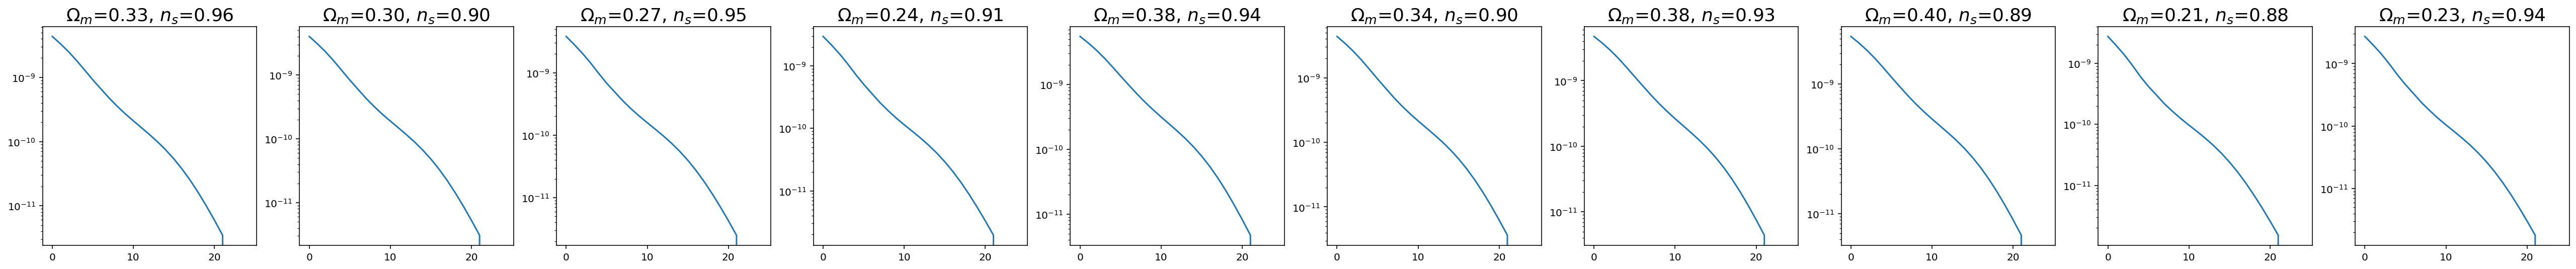

In [8]:
i = 2 ; s = 0

fig, ax = plt.subplots(1, batch_size, figsize=(4*batch_size+5, 4))
plt.rc('font', size=15)

for j in range(batch_size):
    
    ax[j].plot(range(0,25), datav[j].numpy()[25*i+s:25*(i+1)+s])
    
    ax[j].set_title('$\Omega_{m}$='+f'{pco[j][0].numpy():.2f}, '+'$n_{s}$='+f'{pco[j][3].numpy():.2f}') #+'ln(10$^{10}$As)='+f'{pcos[j][3]:.2f}'
    
    ax[j].set_yscale('log')